In [1]:
%matplotlib inline



The [`Info`](https://martinos.org/mne/stable/generated/mne.Info.html) data structure
===========================================

The [`Info`](https://martinos.org/mne/stable/generated/mne.Info.html) data object is typically created
when data is imported into MNE-Python and contains details such as:

- date, subject information, and other recording details
- the sampling rate
- information about the data channels (name, type, position, etc.)
- digitized points
- sensor–head coordinate transformation matrices

and so forth. See the [`the API reference`](https://martinos.org/mne/stable/generated/mne.Info.html)
for a complete list of all data fields. Once created, this object is passed
around throughout the data analysis pipeline.



[`mne.Info`](https://martinos.org/mne/stable/generated/mne.Info.html) behaves as a nested Python dictionary:



In [2]:
import mne
import os.path as op

In [3]:
# Read the info object from an example recording
info = mne.io.read_info(
    op.join(mne.datasets.sample.data_path(), 'MEG', 'sample',
            'sample_audvis_raw.fif'), verbose=False)

List all the fields in the info object



In [4]:
print('Keys in info dictionary:\n', info.keys())

Keys in info dictionary:
 dict_keys(['file_id', 'events', 'hpi_results', 'hpi_meas', 'subject_info', 'hpi_subsystem', 'proc_history', 'meas_id', 'experimenter', 'description', 'proj_id', 'proj_name', 'meas_date', 'sfreq', 'highpass', 'lowpass', 'line_freq', 'gantry_angle', 'chs', 'dev_head_t', 'ctf_head_t', 'dev_ctf_t', 'dig', 'bads', 'ch_names', 'nchan', 'projs', 'comps', 'acq_pars', 'acq_stim', 'custom_ref_applied', 'xplotter_layout', 'kit_system_id'])


List all information about the first data channel



In [5]:
print(info['chs'][0])

{'scanno': 1, 'logno': 113, 'kind': 1, 'range': 0.00030517578125, 'cal': 3.1600000394149674e-09, 'coil_type': 3012, 'loc': array([-0.1066    ,  0.0464    , -0.0604    , -0.0127    ,  0.0057    ,
       -0.99990302, -0.186801  , -0.98240298, -0.0033    , -0.98232698,
        0.18674099,  0.013541  ]), 'unit': 201, 'unit_mul': 0, 'ch_name': 'MEG 0113', 'coord_frame': 1}


Obtain the sampling rate of the data



In [6]:
print(info['sfreq'], 'Hz')

600.614990234375 Hz



Obtaining subsets of channels
-----------------------------

There are a number of convenience functions to obtain channel indices, given
an [`mne.Info`](https://martinos.org/mne/stable/generated/mne.Info.html#mne.Info) object.



Get channel indices by name



In [7]:
channel_indices = mne.pick_channels(info['ch_names'], ['MEG 0312', 'EEG 005'])

Get channel indices by regular expression



In [8]:
channel_indices = mne.pick_channels_regexp(info['ch_names'], 'MEG *')

Channel types
-------------

MNE supports different channel types:

- eeg : For EEG channels with data stored in Volts (V)
- meg (mag) : For MEG magnetometers channels stored in Tesla (T)
- meg (grad) : For MEG gradiometers channels stored in Tesla/Meter (T/m)
- ecg : For ECG channels stored in Volts (V)
- seeg : For Stereotactic EEG channels in Volts (V).
- ecog : For Electrocorticography (ECoG) channels in Volts (V).
- fnirs (HBO) : Functional near-infrared spectroscopy oxyhemoglobin data.
- fnirs (HBR) : Functional near-infrared spectroscopy deoxyhemoglobin data.
- emg : For EMG channels stored in Volts (V)
- bio : For biological channels (AU).
- stim : For the stimulus (a.k.a. trigger) channels (AU)
- resp : For the response-trigger channel (AU)
- chpi : For HPI coil channels (T).
- exci : Flux excitation channel used to be a stimulus channel.
- ias : For Internal Active Shielding data (maybe on Triux only).
- syst : System status channel information (on Triux systems only).

Get channel indices by type

In [9]:
channel_indices = mne.pick_types(info, meg=True)  # MEG only
channel_indices = mne.pick_types(info, meg=False, eeg=True)  # EEG only

MEG gradiometers and EEG channels



In [10]:
channel_indices = mne.pick_types(info, meg='grad', eeg=True)

Get a dictionary of channel indices, grouped by channel type



In [11]:
channel_indices_by_type = mne.io.pick.channel_indices_by_type(info)
print('The first three magnetometers:', channel_indices_by_type['mag'][:3])

The first three magnetometers: [2, 5, 8]


Obtaining information about channels
------------------------------------



Channel type of a specific channel

In [12]:
channel_type = mne.io.pick.channel_type(info, 75)
print('Channel #75 is of type:', channel_type)

Channel #75 is of type: grad


Channel types of a collection of channels



In [13]:
meg_channels = mne.pick_types(info, meg=True)[:10]
channel_types = [mne.io.pick.channel_type(info, ch) for ch in meg_channels]
print('First 10 MEG channels are of type:\n', channel_types)

First 10 MEG channels are of type:
 ['grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad']


Dropping channels from an info structure
----------------------------------------

It is possible to limit the info structure to only include a subset of
channels with the [`mne.pick_info`](https://martinos.org/mne/stable/generated/mne.pick_info.html#mne.pick_info) function:



In [14]:
# Only keep EEG channels
eeg_indices = mne.pick_types(info, meg=False, eeg=True)
reduced_info = mne.pick_info(info, eeg_indices)

print(reduced_info)

<Info | 24 non-empty fields
    acq_pars : str | 13886 items
    bads : list | 0 items
    ch_names : list | EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, ...
    chs : list | 59 items (EEG: 59)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 49 items
    dev_head_t : Transform | 3 items
    dig : list | 146 items
    events : list | 1 items
    experimenter : str | 3 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 172.17630004882812 Hz
    meas_date : tuple | 2002-12-03 19:01:10 GMT
    meas_id : dict | 4 items
    nchan : int | 59
    proc_history : list | 0 items
    proj_id : ndarray | 1 items
    proj_name : str | 4 items
    projs : list | PCA-v1: off, PCA-v2: off, PCA-v3: off
    sfreq : float | 600.614990234375 Hz
    acq_stim : NoneType
    ctf_head_t : NoneType
    dev_ctf_t : NoneType
    gantry_angle : NoneTyp

Exercises
--------------

1) Can you plot the EEG sensors in the info?

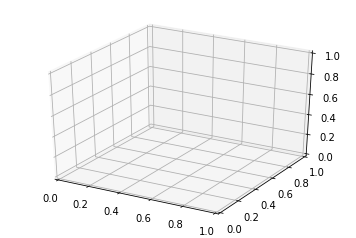

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# your code here to compute x, y, z

# ax.scatter(x, y, z)

In fact, you can use a convenient method `raw.plot_sensors` to just do this.

Opening raw data file /local_mount/space/meghnn/1/users/mjas/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


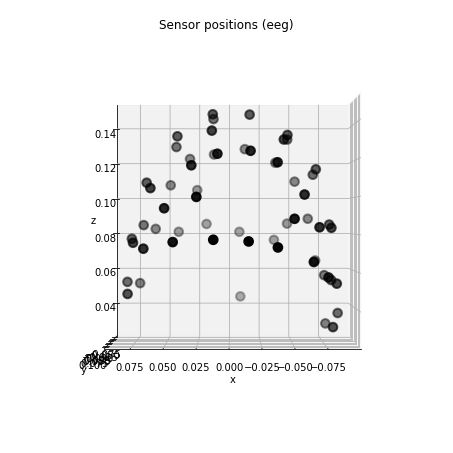

In [16]:
# % matplotlib notebook
data_path = op.join(mne.datasets.sample.data_path(), 'MEG',
                    'sample', 'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(data_path, preload=True).pick_types(eeg=True, meg=False)
raw.plot_sensors(kind='3d');